In [976]:
import pandas as pd
import numpy as np

In [977]:
pd.set_option('display.max_columns', None)


In [978]:
#load the history data
df = pd.read_csv('D:/DKU大三学习/Stats 302/Final Project/Players.csv')

In [1054]:
#load 2022 MVP candidates data for prediction
df_2022 = pd.read_csv('D:/DKU大三学习/Stats 302/Final Project/2022.csv')


In [979]:
df = df.drop('Unnamed: 0',axis = 1)

In [980]:
#drop useless features to create independent features
X = df.drop(['year','rank','team','award_share','MVP'],axis = 1)

In [981]:
X['fg3_pct'] = pd.to_numeric(X['fg3_pct'],errors='coerce')

In [982]:
#create target features
Y = pd.DataFrame(np.c_[df['player'],df['MVP'],df['award_share']],columns = ['player','MVP','award_share'])

In [983]:
Y

,player,MVP,award_share
0,Kareem Abdul-Jabbar,T,0.665
1,Julius Erving,F,0.143
2,George Gervin,F,0.086
3,Larry Bird,F,0.068
4,Tiny Archibald,F,0.009
...,...,...,...
680,Russell Westbrook,F,0.005
681,Ben Simmons,F,0.003
682,James Harden,F,0.001
683,LeBron James,F,0.001


In [984]:
#check for nuan values
X.isnull().sum()

player        0
age           0
games         0
mp_per_g      0
pts_per_g     0
trb_per_g     0
ast_per_g     0
stl_per_g     0
blk_per_g     0
fg_pct        0
fg3_pct      25
ft_pct        0
ws            0
ws_per_48     0
W             0
L             0
W/L           0
seed          0
dtype: int64

In [1099]:
Y.isnull().sum()

player         0
MVP            0
award_share    0
dtype: int64

In [985]:
#check for data types
X.dtypes

player        object
age            int64
games          int64
mp_per_g     float64
pts_per_g    float64
trb_per_g    float64
ast_per_g    float64
stl_per_g    float64
blk_per_g    float64
fg_pct       float64
fg3_pct      float64
ft_pct       float64
ws           float64
ws_per_48    float64
W              int64
L              int64
W/L          float64
seed           int64
dtype: object

In [986]:
#create independent features for regression
X_reg = X.iloc[:,1:]

In [987]:
#create target feature, which is only award share
Y_reg = Y.iloc[:,2]

In [915]:
#concate two dataframes to a new one in order to build confusion matrix
data_matrix = pd.concat([X_reg, Y_reg], axis=1)

In [916]:
data_matrix

,age,games,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,W,L,W/L,seed,award_share
0,32,82,38.3,24.8,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,60,22,0.732,2,0.665
1,29,78,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,59,23,0.720,3,0.143
2,27,78,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,41,41,0.500,10,0.086
3,23,82,36.0,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,61,21,0.744,1,0.068
4,31,80,35.8,14.1,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,61,21,0.744,1,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,32,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,34,38,0.472,17,0.005
681,24,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,49,23,0.681,3,0.003
682,31,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,48,24,0.667,4,0.001
683,36,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,42,30,0.583,9,0.001


In [917]:
#convert award_share data type to float
data_matrix['award_share'] = data_matrix['award_share'].astype(float)

In [918]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

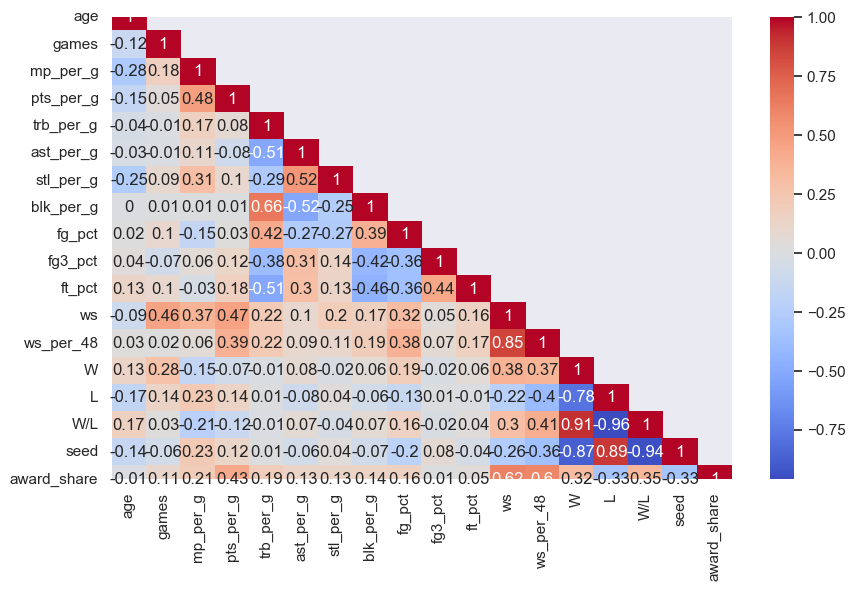

In [1098]:
# compute the pair wise correlation for all columns  
correlation_matrix = data_matrix.corr().round(2)

# print heatmap of the correlation matrix
# next two lines remove the duplicate upper half of matrix
mask = np.zeros(correlation_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask),1)] = True

sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(data=correlation_matrix, annot = True, cmap = "coolwarm", mask = mask); 

In [1064]:
#keep the features whose absolute linear correlation with award_share is larger than 0.3 in order for linear regression
X_lin = pd.DataFrame(np.c_[data_matrix['pts_per_g'],data_matrix['ws'],data_matrix['ws_per_48'],data_matrix['W/L'],data_matrix['W'],data_matrix['L']],
                     columns = ['pts_per_g','ws','ws_per_48','W/L','W','L'])

In [1065]:
#do the same thing with 2022 candidates data
X_2022_lin = pd.DataFrame(np.c_[df_2022['pts_per_g'],df_2022['ws'],df_2022['ws_per_48'],df_2022['W/L'],df_2022['W'],df_2022['L']],
                     columns = ['pts_per_g','ws','ws_per_48','W/L','W','L'])

In [1066]:
X_lin

,pts_per_g,ws,ws_per_48,W/L,W,L
0,24.8,14.8,0.227,0.732,60.0,22.0
1,26.9,12.5,0.213,0.720,59.0,23.0
2,33.1,10.6,0.173,0.500,41.0,41.0
3,21.3,11.2,0.182,0.744,61.0,21.0
4,14.1,8.9,0.148,0.744,61.0,21.0
...,...,...,...,...,...,...
680,22.2,3.7,0.075,0.472,34.0,38.0
681,14.3,6.0,0.153,0.681,49.0,23.0
682,24.6,7.0,0.208,0.667,48.0,24.0
683,25.0,5.6,0.179,0.583,42.0,30.0


In [1067]:
#set the target variable of linear regression as award_share
Y_lin = data_matrix['award_share']

In [1068]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
X_train, X_test, Y_train, Y_test = train_test_split(X_lin, Y_lin, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(548, 6)
(137, 6)


In [1069]:
#standardize train and test data set
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)


X_test_norm = normalizer.fit_transform(X_test)
#X_test_norm
X_train_norm.shape

(548, 6)

In [1070]:
#normalize 2022 data for preiction
normalizer = preprocessing.Normalizer()
X_2022_norm = normalizer.fit_transform(X_2022_lin)

In [1071]:
# Train the model using sklearn LinearRegression
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train_norm, Y_train)

LinearRegression()

In [1072]:
from sklearn.metrics import r2_score
# model evaluation for training set
Y_train_predict = lin_model.predict(X_train_norm)
r2 = r2_score(Y_train, Y_train_predict)
print('the R^2 score of the training data is {:.3f}'.format(r2))

# model evaluation for testing set
Y_test_predict = lin_model.predict(X_test_norm)
r2 = r2_score(Y_test, Y_test_predict)
print('the R^2 score of the test data is {:.3f}'.format(r2))

the R^2 score of the training data is 0.480
the R^2 score of the test data is 0.511


In [1089]:
#appply l2 regularization for improvement
from sklearn import linear_model
ridge=linear_model.Ridge()

In [1090]:
#set hyperparameter
etas = np.logspace(-9, 6, 40)


In [1091]:
train_errors = list()
test_errors = list()

In [1092]:
# do the regression for different etas
for n in etas:
    ridge.set_params(alpha=n)
    ridge.fit(X_train_norm, Y_train)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors.append(ridge.score(X_train_norm, Y_train))
    test_errors.append(ridge.score(X_test_norm, Y_test))

In [1093]:
import matplotlib.pyplot as plt

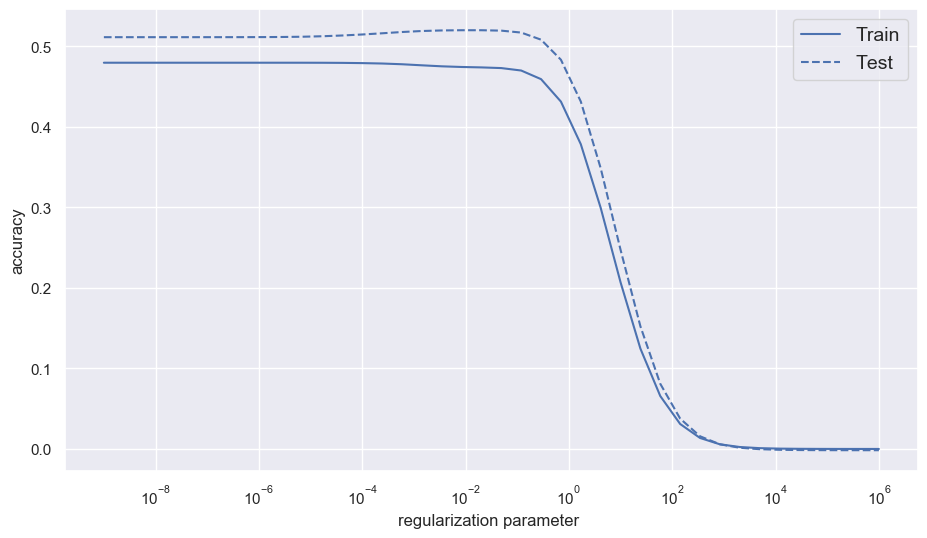

In [1094]:
# Plot our performance on both the training and test data
plt.figure(figsize=(11,6))
plt.semilogx(etas, train_errors, 'b',label='Train')
plt.semilogx(etas, test_errors, '--b',label='Test')
plt.legend(loc='upper right',fontsize=14)
plt.xlabel('regularization parameter ')
plt.ylabel('accuracy')
plt.show()

In [1079]:
#apply polynomial regression
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree)
  
#transforme the train and test data set to polynomial form
X_train_poly = poly_features.fit_transform(X_train_norm)
X_test_poly  = poly_features.fit_transform(X_test_norm)
#the shape pf X_train_poly
print(X_train_poly.shape)

(548, 28)


In [1080]:
#do the same thing for 2022 candidates data set
X_2022_poly = poly_features.fit_transform(X_2022_norm)

In [1081]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
  
# predicting and evaluating training data-set
Y_train_predicted = poly_model.predict(X_train_poly)
r2_train = r2_score(Y_train, Y_train_predicted) 
print('the R^2 score of the training data is {:.3f}'.format(r2_train))
    
# predicting and evaluating test data-set
Y_test_predict = poly_model.predict(X_test_poly)
r2_test = r2_score(Y_test, Y_test_predict)  
print('the R^2 score of the test data is {:.3f}'.format(r2_test)) 

the R^2 score of the training data is 0.617
the R^2 score of the test data is 0.611


In [1082]:
#make prediction for 2022 candidates data
Y_2022_poly = poly_model.predict(X_2022_poly)

In [1083]:
Y_2022_poly

array([ 0.37890625,  0.37695312,  0.29882812,  0.01953125,  0.11328125,
        0.08398438,  0.04101562,  0.08007812,  0.19140625, -0.13085938])

In [1085]:
#build dataframe to visualize winner
df_2022_poly = pd.DataFrame(np.c_[df_2022['player'],Y_2022_poly],columns = ['player','award_share'])
df_2022_poly

,player,award_share
0,Nikola Jokic,0.378906
1,Giannis Antetokounmpo,0.376953
2,Joel Embiid,0.298828
3,Chris Paul,0.0195312
4,Rudy Gobert,0.113281
5,James Harden,0.0839844
6,Luka Doncic,0.0410156
7,Ja Morant,0.0800781
8,Stephen Curry,0.191406
9,Devin Booker,-0.130859
